<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2023 @ Authors</i></b><br/>
        作者：<a style="font-weight:bold" href="mailto:bshan@mail.hust.edu.cn">斯坦福大厨 📨 </a><br>
        日期：2023-08-09<br/>
        <img src="https://github.com/stanfordbshan/CompMatBook/blob/main/author.png?raw=true" width="100"/>
        共享协议：本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议</a>进行许可。</i><br/>
    </p>
</div>

恭喜您已经发现了这份神奇的计算材料学课件！这份课件是我在熬夜吃掉不计其数的披萨和咖啡后创作出来的，配套的教材是由单斌、陈征征、陈蓉合著的《计算材料学--从算法原理到代码实现》。学习资料合集您可以在这个网址找到：[www.materialssimulation.com/book](www.materialssimulation.com/book)，您也可以跟着up主[无人问津晦涩难懂的B站视频](https://space.bilibili.com/1111135013/channel/collectiondetail?sid=1458375)一起进行学习。希望它能帮您在计算材料学的道路上摔得不那么痛。

就像您尊重那些一边烘焙披萨一边写代码的大厨一样，当您使用这份课件时，请：

- 记得告诉大家这份课件是斯坦福大厨写的，并且他在华中科技大学微纳中心工作
- 别用它去赚大钱，这个课件是用来学习的，不是用来买披萨的
- 保持开放共享的精神




如果你有关于计算材料学的想法，或者你只是想和我讨论最好吃的披萨口味，欢迎通过邮件 bshan@mail.hust.edu.cn 联系我。

# 目录（对应《计算材料学》章节1.3.1）

<img src="https://github.com/stanfordbshan/CompMatBook/blob/main/cover.png?raw=true" width="200"/>

* [最速下降法](#SD)
* [Python实现](#Python)
    * [1. 基本概念](#basics)
    * [2. 算法步骤](#algo)
    * [3. 特性和优缺点](#proscons)
* [参考](#references)

<a name="SD"></a>
# 最速下降法

最速下降法（Steepest Descent Method）是一种迭代的数值优化技术，用于求解多维函数的局部最小值。这种方法在多个领域，如机器学习、化学和物理中都有广泛的应用。最速下降法的基本思想是：在每一步迭代中，从当前位置开始，沿着函数在该点梯度方向（即最速下降方向）进行搜索，找到使函数值下降最快的点作为新的迭代点，直到满足停止准则。

<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg" width="400" height="400" alt="最速下降法">


下面是最速下降法的详细介绍：



<a name="Python"></a>
# 如何用python实现二次型的最速下降法

<a name="basics"></a>
### 1. 基本概念
下面我们将通过一个二次型函数的例子来演示如何用python实现最速下降法。我们要求解的函数为：

$$f(x)=\frac{1}{2}x^TAx-b^Tx+c$$

其中，$A$是一个对称矩阵，$b$是一个向量，$c$是一个常数。在这个例子中，我们设定$c=0$，$A$和$b$如下：

$$A=\begin{bmatrix}
3 & 2  \\
2 & 6  \\
\end{bmatrix}$$

$$b=\begin{bmatrix}
2   \\
-8   \\
\end{bmatrix}$$

首先，我们需要定义函数$f(x)$和它的梯度。然后，我们使用最速下降法进行迭代，直到满足停止准则。这里涉及到几个基本概念：

- **目标函数**：要最小化的多维函数，这里就是$f(x)$。
- **梯度**：目标函数在给定点的梯度是一个向量，表示该点的最陡上升方向，这里就是$Ax-b$。
- **步长**：沿着负梯度方向移动的距离。




In [ ]:
import numpy as np

# 定义函数和梯度
A = np.array([[3.0, 2.0], [2.0, 6.0]])
b = np.array([2.0, -8.0])
c = 0.0

def f(x):
    return 0.5 * x.T @ A @ x - b.T @ x + c

def grad_f(x):
    return A @ x - b

In [ ]:
# test gradient
x = np.array([3.1415926,-3.1415926])
df = grad_f(x)
print(df)

[ 1.1415926 -4.5663704]


我们可视化这个二次型的等高线，可以观察到，其最低点的位置在(2,-2)处。

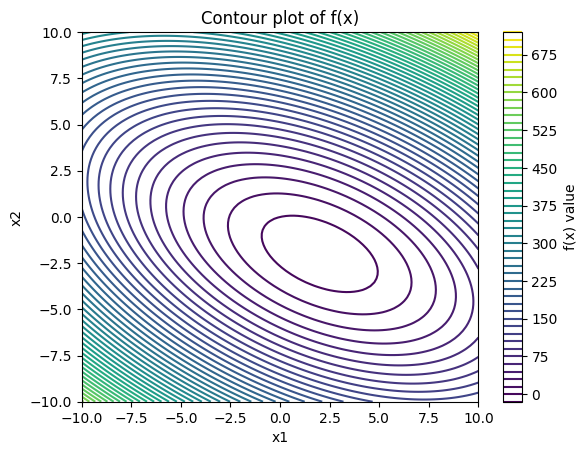

In [ ]:
import matplotlib.pyplot as plt
# Create a meshgrid for x and y values
x_values = np.linspace(-10, 10, 100)
y_values = np.linspace(-10, 10, 100)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

# Compute f(x) for each point in the meshgrid
z_values = np.array([[f(np.array([x, y])) for x in x_values] for y in y_values])

# Plot the contour
plt.contour(x_mesh, y_mesh, z_values, levels=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour plot of f(x)')
plt.colorbar(label='f(x) value')
plt.show()


<a name="algo"></a>
### 2. 算法步骤

1. **初始化**：选择一个初始点和停止准则。
2. **计算梯度**：在当前点计算目标函数的梯度。
3. **检查收敛**：如果梯度的大小小于某个阈值，则停止迭代。
4. **确定步长**：通过线搜索或其他方法确定合适的步长。
5. **更新位置**：沿着负梯度方向，使用选定的步长更新当前点的位置。
6. **重复**：返回第二步，直到满足停止准则。

具体的，对于二次型，步长有解析表达式，最速下降法的更新规则为：

$$x^{k+1} = x^k +\alpha_k p^k$$

其中

$$p^k = b-Ax^k$$
$$\alpha_k = \frac{(p^k,p^k)}{(Ap^k,p^k)}$$



In [ ]:
# 最速下降法
def steepest_descent(x0, tol=1e-5, max_iter=1000):
    x = x0
    for i in range(max_iter):
        p = -grad_f(x)
        if np.linalg.norm(p) < tol:
            break
        alpha = p.T @ p / (p.T @ A @ p)
        x = x + alpha * p
    return x

# 初始点
x0 = np.array([-4, -4])

# 运行最速下降法
x_star = steepest_descent(x0)

print("The solution is", x_star)
print("The value of the function at the solution is", f(x_star))

The solution is [ 1.99999877 -2.00000041]
The value of the function at the solution is -9.999999999996222


<a name="proscons"></a>
### 3. 特性和优缺点

- **全局收敛**：最速下降法通常全局收敛到某个局部最小值。
- **收敛速度**：在某些情况下，最速下降法可能收敛缓慢，特别是当目标函数的等高线呈现椭圆形状时。
- **简单易实现**：算法的结构简单，容易编程实现。
- **可扩展性**：适用于大规模优化问题。
- **依赖于选择的初始点和步长策略**：不同的初始点和步长选择策略可能导致不同的收敛行为。

最速下降法的收敛速度与函数$F$的条件数（最大特征值与最小特征值的比值）成正比。事实上，可以证明，连续两次最速下降的搜索方向彼此正交。如果$F$的条件数较大，例如考虑一个二元函数$F(x_1,x_2)$，在极值点$\mathbf{x}^*$附近，可以将其近似为二次函数，其等高线形状为一系列偏心率较大的同心椭圆。如下图所示，每一步的负梯度方向$\mathbf{r}_k$并未直接指向极值点，因此搜索方向在"之"字形路径中迂回逼近极值点。进一步地，随着迭代点逐渐靠近极值点，搜索步长会越来越小，从而导致收敛速度下降。显然，这种情况下的效率并不理想。以下的例子直观地展示了最速下降法的缺陷：

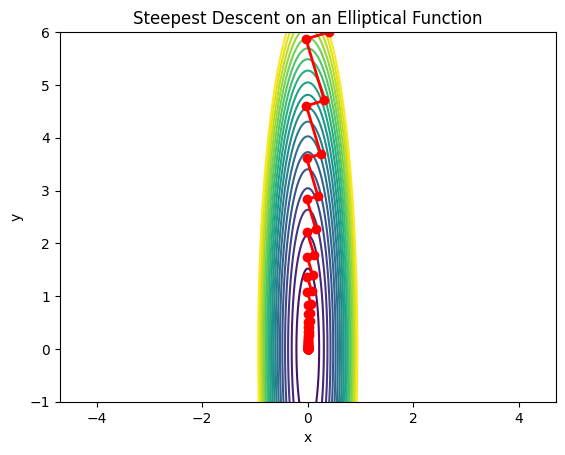

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define an elliptical quadratic function
A = np.array([[50, 0], [0, 1]])
b = np.array([0, 0])
c = 0

def f(x):
    return 0.5 * x.T @ A @ x - b.T @ x + c

def gradient(x):
    return A @ x - b

# Steepest descent method
def steepest_descent(f, gradient, x0, max_iter=1000, tol=1e-6):
    x = x0
    path = [x]
    for _ in range(max_iter):
        grad = gradient(x)
        alpha = (grad.T @ grad) / (grad.T @ A @ grad) # Exact line search for quadratic function
        x_new = x - alpha * grad
        path.append(x_new)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(path)

# Initial guess and optimization
x0 = np.array([0.4, 6])
path = steepest_descent(f, gradient, x0)

# Contour plot
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-6, 6, 400))
Z = np.array([f(np.array([x, y])) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
contour_levels = np.unique(np.linspace(f(x0), f(path[-1]), 20))  # 20 unique contour levels between start and end
plt.contour(X, Y, Z, levels=contour_levels)
plt.plot(path[:, 0], path[:, 1], 'ro-', lw=2)

plt.title("Steepest Descent on an Elliptical Function")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')

# Zoom in on the path
xmin, xmax = -2,2
ymin, ymax = -1,6
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()



# 参考视频

- https://www.bilibili.com/video/BV1tz4y1M7Gy/
- https://www.bilibili.com/video/BV1z94y1z7k4/